In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install tensorflow keras numpy matplotlib pandas sklearn biopython  nltk

     |████████████████████████████████| 2.3MB 7.3MB/s 


In [4]:
import nltk
nltk.download('popular')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import pandas as pd

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [5]:
messages = pd.read_csv('/content/drive/My Drive/NLP_datasets/smsspamcollection/SMSSpamCollection', sep='\t',
                           names=["label", "message"])

In [7]:
print(messages.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


### Data cleaning and preprocessing

In [9]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

print(corpus[0:5])

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though']


Creating the Bag od document matrix of Words model

In [10]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values


In [12]:
print("Features : ", X[0:5])
print("Label :", y[0:5])

Features :  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Label : [0 0 1 0 0]


Train Test Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


Training model using Naive bayes classifier

In [15]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred=spam_detect_model.predict(X_test)
print("prediction :",y_pred[0:5])

prediction : [0 1 0 0 0]


In [16]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
results = confusion_matrix(y_test,y_pred) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred))
print ('Report : ')
print (classification_report(y_test,y_pred))

Confusion Matrix :
[[946   9]
 [  7 153]]
Accuracy Score : 0.9856502242152466
Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.94      0.96      0.95       160

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probs = spam_detect_model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print(lr_auc)

0.9903075916230366


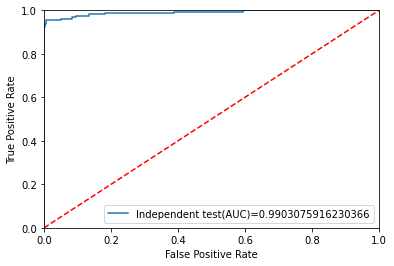

In [19]:
from matplotlib import pyplot
# calculate roc curves
test_fpr, test_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.plot(test_fpr,test_tpr,label="Independent test(AUC)="+str(lr_auc))
# show the legend
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0, 1])
pyplot.ylim([0, 1])
pyplot.legend()
# show the plot
pyplot.show()